<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
# import your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import warnings 
warnings.filterwarnings("ignore")

#### Load the health insurance dataset and check the first five observations

In [2]:
# import your code here
df=pd.read_csv('health_insurance.csv')
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


In [3]:
df.isnull().sum()

age             0
gender          0
bmi             0
bp              0
children        0
region          0
smoker          0
medical_cost    0
dtype: int64

In [4]:
df.children.value_counts()

0    553
1    315
2    235
3    155
4     24
5     18
Name: children, dtype: int64

### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

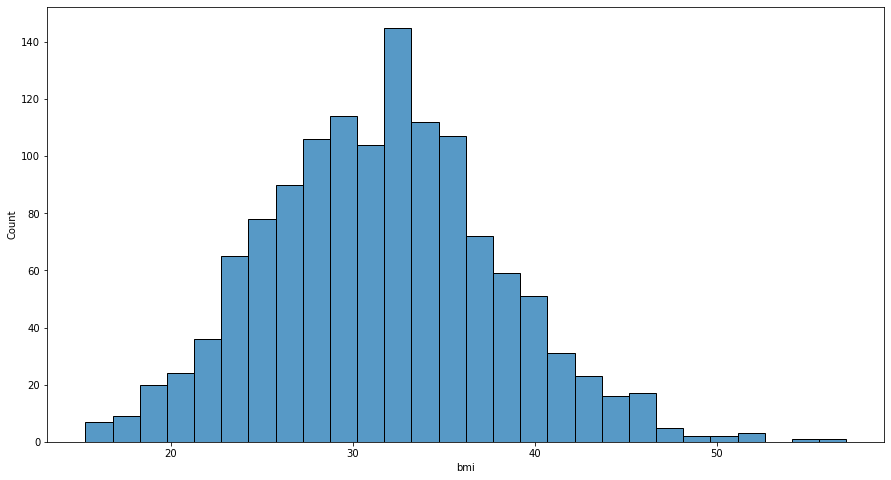

In [5]:
# import your code here
plt.figure(figsize=(15,8))
sns.histplot(data=df,x='bmi')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# import your code here
df['age'].skew()

0.04359793424360781

<AxesSubplot:xlabel='age', ylabel='Count'>

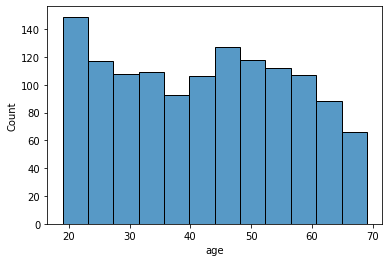

In [7]:
sns.histplot(data=df,x='age')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost', ylabel='Density'>

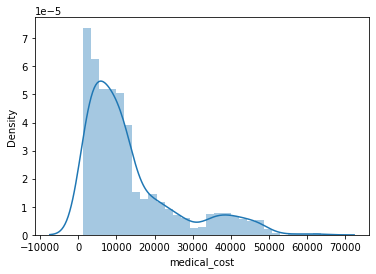

In [12]:
# import your code here
sns.distplot(df['medical_cost'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

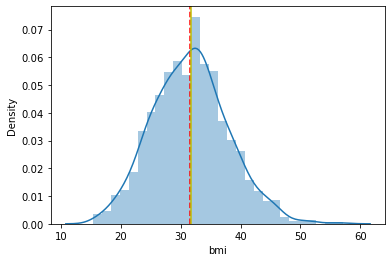

In [15]:
# import your code here
mean=df['bmi'].mean()
median=df['bmi'].median()
mode=df['bmi'].mode()[0]
sns.distplot(df['bmi'])
plt.axvline(mean,color='r',ls='--')
plt.axvline(median,color='y')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost'>

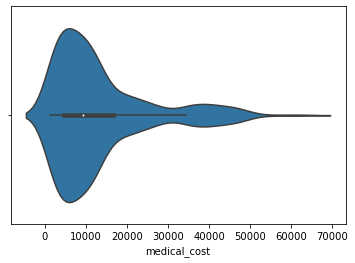

In [16]:
# import your code here
sns.violinplot(data=df,x='medical_cost')

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# import your code here
df.loc[(df['age']<30) & (df['medical_cost']>=40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='bmi', ylabel='medical_cost'>

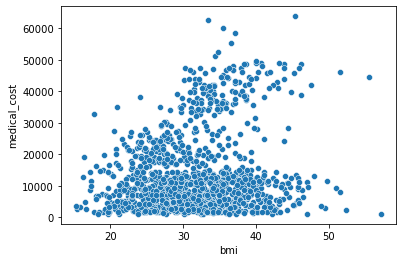

In [22]:
# import your code here
sns.scatterplot(data=df,x='bmi',y='medical_cost')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Text(0, 0.5, 'percentage')

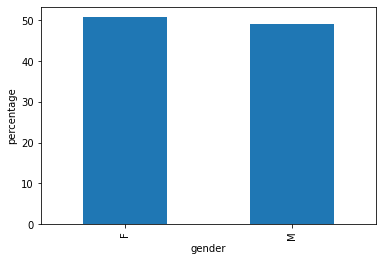

In [25]:
# import your code here
d=pd.DataFrame(df['bmi'].groupby(df['gender']).var())
d['per']=(d['bmi']/d['bmi'].sum())*100
d['per'].plot(kind='bar')
plt.ylabel('percentage')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='region,gender'>

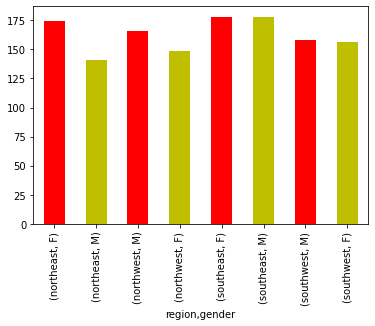

In [30]:
# import your code here
df['gender'].groupby(df['region']).value_counts().plot(kind='bar',color=['r','y'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

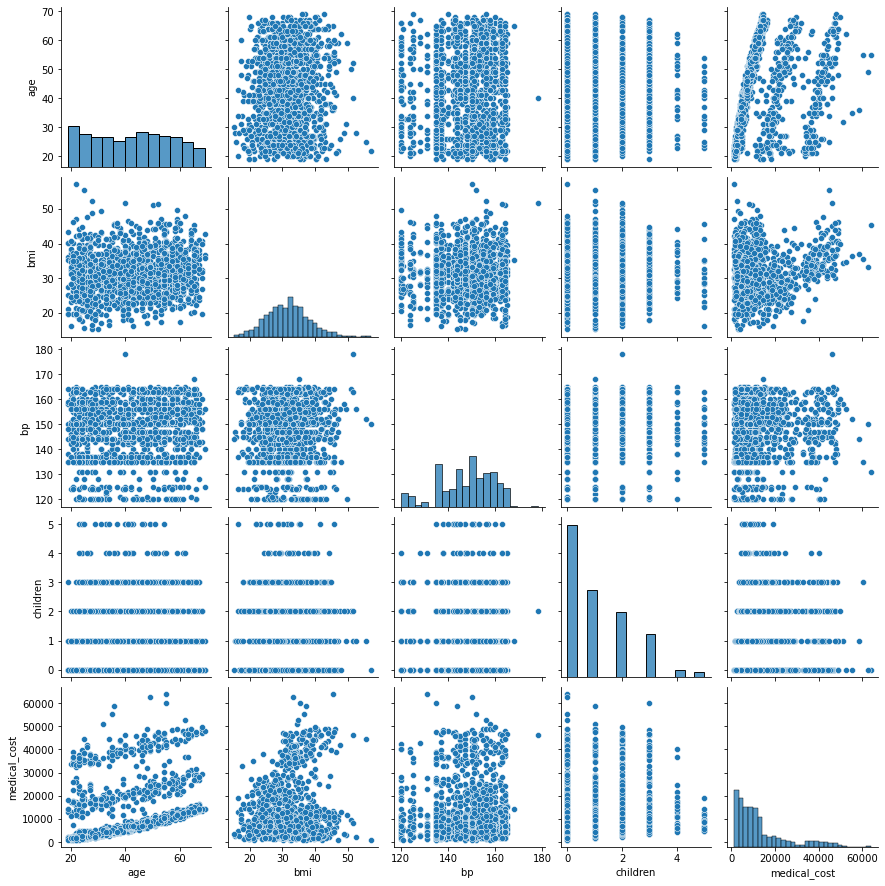

In [31]:
# import your code here
sns.pairplot(df)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

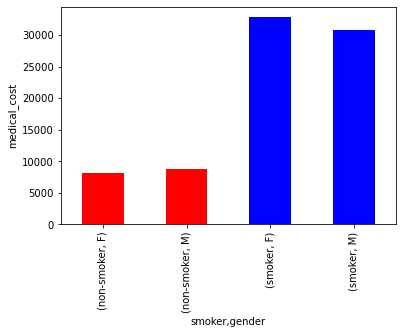

In [38]:
# import your code here
df['medical_cost'].groupby([df['smoker'], df['gender']]).mean().plot(kind='bar', color=['r', 'r', 'b', 'b'])
plt.ylabel('medical_cost')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='region'>

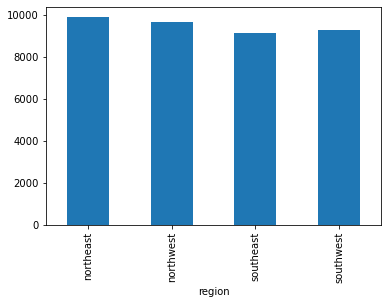

In [46]:
# import your code here
df['medical_cost'].groupby(df['region']).median().plot(kind='bar')

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# import your code here
pd.get_dummies(df.region)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1295,0,0,0,1
1296,1,0,0,0
1297,0,0,1,0
1298,0,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# import your code here
df['smoker_label']=df.smoker.map({'smoker':1, 'non-smoker':0})
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# import your code here
freq=df.gender.value_counts(normalize=True)
df['gender_freq']=df.gender.map(freq)
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# import your code here
df['var']=df.smoker.map({'smoker':1,'non-smoker':0})
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq,var
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# import your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s = scaler.fit_transform(df[['bmi']])
s


array([[ 0.05014192],
       [ 0.8165832 ],
       [ 0.53802035],
       ...,
       [ 0.51441333],
       [-1.06725708],
       [ 0.23427668]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# import your code here
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
s=min_max.fit_transform(df[['age']])
s

array([[0.08],
       [0.02],
       [0.28],
       ...,
       [0.04],
       [0.06],
       [0.88]])

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# import your code here
df.skew()

age             0.043598
bmi             0.249677
bp             -0.611335
children        0.927783
medical_cost    1.534185
smoker_label    1.471971
gender_freq    -0.021565
var             1.471971
dtype: float64

In [53]:
df['log_med_cost'] = np.log(df['medical_cost'])
df

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq,var,log_med_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,1,9.734176
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,0,7.453302
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,0,8.400538
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,0,9.998092
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,0,8.260197
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,0,0.505385,0,9.268661
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,0,0.494615,0,7.698927
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,0,0.494615,0,7.396233
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,0,0.494615,0,7.604867


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

<AxesSubplot:>

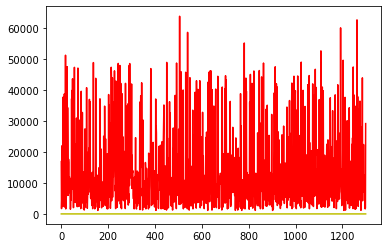

In [54]:
# import your code here
df['medical_cost'].plot(color='r')
df['log_med_cost'].plot(color='y')